# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.127058e+01     7.975969e+00
 * time: 0.0018460750579833984
     1     2.801440e+01     4.321579e+00
 * time: 0.0077440738677978516
     2     1.887347e+01     5.150555e+00
 * time: 0.014799118041992188
     3     1.224391e+01     3.220299e+00
 * time: 0.021865129470825195
     4     1.205427e+01     4.538281e+00
 * time: 0.06380915641784668
     5     1.099430e+01     2.490552e+00
 * time: 0.06896495819091797
     6     9.912436e+00     1.950966e+00
 * time: 0.07605314254760742
     7     9.033847e+00     1.521189e+00
 * time: 0.08294510841369629
     8     8.510586e+00     8.332180e-01
 * time: 0.08862900733947754
     9     8.299409e+00     7.239830e-01
 * time: 0.09373998641967773
    10     8.190066e+00     4.484674e-01
 * time: 0.09970307350158691
    11     8.143064e+00     6.437762e-01
 * time: 0.10433411598205566
    12     8.096972e+00     5.398668e-01
 * time: 0.10895109176635742
    13     8.042412e+00     3.953065e-01
 *

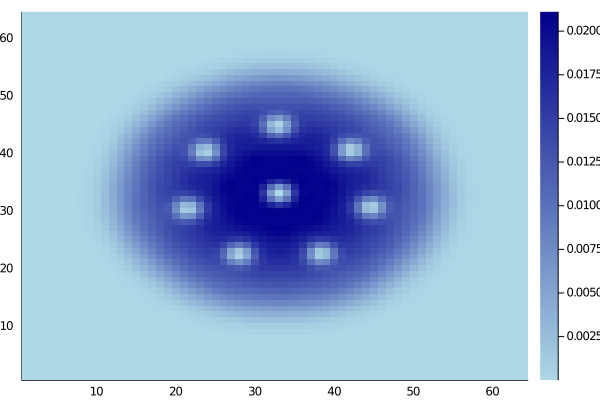

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)